## TrpR_IAA

Exemplary design of the trpytophane repressor (PDB: 1ZT9) with the ligand indole-3-acetic acid (IAA).

In [1]:
# This is a comment. It's marked by a leading "#" symbol

# Import OS and system libraries
import sys
import os
import logging

# Append the pocketoptimizer code to your $PYTHONPATH
cwd = os.getcwd()
po_dir = os.path.abspath(os.path.join(cwd, '..'))
project_dir = os.path.join(cwd, 'TrpR_IAA')
if not po_dir in sys.path:
    sys.path.insert(0, po_dir)

# Import Pocketoptimizer
import pocketoptimizer as po

# Remove most warnings, only show Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
# Initialize a new design pipeline
design = po.DesignPipeline(work_dir=project_dir,         # Path to working directory containing scaffold and ligand subdirectory
                           ph=7,                         # pH used for protein and ligand protonation
                           forcefield='amber_ff14SB',    # forcefield used for all energy computations (Use Amber as it is better tested!)
                           intra=False,                  # Whether to score intramolecular energies or not (Experimental, should be turned off!)
                           elec=0.01,                    # Scaling factor for electrostatic energies (1 %, you might want to increase that!)
                           ncpus=8)                      # Number of CPUs for multiprocessing

2022-11-10 16:42:37,175 - pocketoptimizer.ui - INFO - Logging to: /agh/projects/jakob/PycharmProjects/PocketOptimizer2/docs/tutorials/TrpR_IAA/pocketoptimizer.log


### From now on you are inside the directory of your design!

In [3]:
# Prepare ligand
design.parameterize_ligand(input_ligand='ligand/IAA.sdf',  # Input ligand structure file could be .mol2/.sdf
                           addHs=True                      # Whether to add hydrogen atoms to the input structure
                           )

2022-11-10 16:42:40,737 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-11-10 16:42:40,738 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
2022-11-10 16:42:41,603 - root - WARNING - Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.
2022-11-10 16:42:42,116 - pocketoptimizer.preparation.structure_building - INFO - Adding hydrogen atoms to the ligand according to pH: 7.
2022-11-10 16:42:55,992 - pocketoptimizer.preparation.structure_building - INFO - Parameterize ligand for GAFF2.
2022-11-10 16:42:56

In [4]:
design.prepare_protein(
    protein_structure='scaffold/1ZT9.pdb',  # Input PDB
    keep_chains=['A', 'B'],  # Specific protein chains to keep
    minimize=True,           # Whether to minimize the input protein structure
    backbone_restraint=True, # Restrains the backbone during the minimization
    cuda=False,               # Performs minimization on CPU instead of GPU
    discard_mols=[{'chain': 'A', 'resid': '1001'}]     # Special molecules to exclude. Per default everything, but peptides have to be defined manually
    )

2022-11-10 16:42:57,004 - pocketoptimizer.ui - INFO - Start Protein Preparation.
2022-11-10 16:42:57,007 - pocketoptimizer.preparation.structure_building - INFO - Starting protein preparation.
2022-11-10 16:42:57,236 - pocketoptimizer.preparation.structure_building - INFO - Protonate protein according to pH: 7.
2022-11-10 16:42:57,419 - moleculekit.tools.preparation - WARNING - Both chains and segments are defined in Molecule.chain / Molecule.segid, however they are inconsistent. Protein preparation will use the chain information.



---- Molecule chain report ----
Chain A:
    First residue: SER     5  
    Final residue: LEU   105  
Chain B:
    First residue: SER     5  
    Final residue: TRP   901  
---- End of chain report ----



2022-11-10 16:42:59,223 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 A to HID
2022-11-10 16:42:59,224 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 A to HID
2022-11-10 16:42:59,224 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 B to HID
2022-11-10 16:42:59,225 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 B to HID
2022-11-10 16:42:59,226 - moleculekit.tools.preparation - WARNING - Dubious protonation state: the pKa of 2 residues is within 1.0 units of pH 7.0.
2022-11-10 16:42:59,227 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 A (pKa= 6.16)
2022-11-10 16:42:59,228 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 B (pKa= 6.24)
2022-11-10 16:42:59,831 - pocketoptimizer.preparation.structure_building - INFO - Successfully prepared protein structure.
2022-11-10 16:42:59,832 - pocketoptimizer.ui - INFO - Building complex.
2022-11-1

In [5]:
design.prepare_lig_conformers(
    nconfs=50,         # Maximum number of conformers to produce (Sometimes these methods produce lower number of conformations)
    method='genetic',  # Genetic method in OpenBabel, other option is confab
    score='rmsd',      # Filters conformers based on RMSD
    )

2022-11-10 16:43:31,871 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Starting ligand conformer generation using obabel.
2022-11-10 16:43:31,872 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Selected Method: genetic.
2022-11-10 16:43:33,319 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Generated 50 conformers.
2022-11-10 16:43:33,322 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Conformer sampling was successful.


In [6]:
# Your mutations
design.set_mutations([{'mutations': ['LEU', 'THR'], 'resid': '88', 'chain': 'B'}, 
                      {'mutations': ['ARG'], 'resid': '84', 'chain': 'B'}, 
                      {'mutations': ['LEU','THR'], 'resid': '44', 'chain': 'A'}]
)

2022-11-10 16:43:33,336 - pocketoptimizer.ui - INFO - If design positions are removed or added a new design run should be started.


In [7]:
# Prepares all defined mutants and glycine scaffolds for side chain rotamer and ligand pose sampling
design.prepare_mutants(sampling_pocket='GLY')

2022-11-10 16:43:33,987 - pocketoptimizer.ui - INFO - Start building mutated protein scaffold variants.
2022-11-10 16:43:33,988 - pocketoptimizer.ui - INFO - Build GLY sampling pockets.
2022-11-10 16:43:34,492 - pocketoptimizer.preparation.structure_building - INFO - Build ligand sampling pocket.
2022-11-10 16:43:34,982 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-11-10 16:43:35,156 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-11-10 16:43:35,482 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-11-10 16:43:36,943 - pocketoptimizer.preparation.structure_building - INFO - Build mutation: A_44_LEU.
2022-11-10 16:43:37,510 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-11-10 16:43:37,687 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-11-10 16:43:38,070 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-11-10 16:43:39,544 - 

In [8]:
# Sampling of side chain rotamers
design.sample_sidechain_rotamers(
    vdw_filter_thresh=100,         # Energy threshold of 100 kcal/mol for filtering rotamers
    library='dunbrack',            # Use dunbrack rotamer library (Should be used!)
    dunbrack_filter_thresh=0.001,  # Probability threshold for filtering rotamers (0.1%)
    accurate=False,                # Increases the number of rotamers sampled when using dunbrack (Be careful about the computation time!)
    include_native=True            # Include the native rotamers from the minimized structure
)

2022-11-10 16:44:11,577 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Start rotamer sampling procedure using FFEvaluate.
2022-11-10 16:44:11,578 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Using 8 CPU's for multiprocessing.
2022-11-10 16:44:12,356 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_LEU not sampled yet.


A_44_LEU:   0%|          | 0/64 [00:00<?, ?it/s]

2022-11-10 16:44:30,355 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 27/64 rotamers within energy threshold of 100 kcal/mol for LEU at position: A_44.
2022-11-10 16:44:30,374 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_THR not sampled yet.


A_44_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-11-10 16:44:40,646 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/10 rotamers within energy threshold of 100 kcal/mol for THR at position: A_44.
2022-11-10 16:44:40,656 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_84_ARG not sampled yet.


B_84_ARG:   0%|          | 0/370 [00:00<?, ?it/s]

2022-11-10 16:45:50,662 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 349/370 rotamers within energy threshold of 100 kcal/mol for ARG at position: B_84.
2022-11-10 16:45:50,716 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_LEU not sampled yet.


B_88_LEU:   0%|          | 0/55 [00:00<?, ?it/s]

2022-11-10 16:46:08,622 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 27/55 rotamers within energy threshold of 100 kcal/mol for LEU at position: B_88.
2022-11-10 16:46:08,635 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_THR not sampled yet.


B_88_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-11-10 16:46:18,980 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 7/10 rotamers within energy threshold of 100 kcal/mol for THR at position: B_88.
2022-11-10 16:46:19,010 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamer sampling procedure is finished.


In [9]:
# Sampling of ligand poses
# Defines a grid in which the ligand is translated and rotated along.
#                       Range, Steps
sample_grid = {'trans': [1, 0.5],  # Angstrom
               'rot': [20, 20]}    # Degree
design.sample_lig_poses(
    method='grid',         #  Uses the grid method. Other option is random
    grid=sample_grid,      #  Defined grid for sampling    
    vdw_filter_thresh=100, #  Energy threshold of 100 kcal/mol for filtering ligand poses
    max_poses=10000        #  Maximum number of poses
)

2022-11-10 16:46:19,108 - pocketoptimizer.ui - INFO - Sample ligand poses.
2022-11-10 16:46:19,111 - pocketoptimizer.sampling.ligand_poses - INFO - Start ligand pose sampling procedure.
2022-11-10 16:46:20,315 - pocketoptimizer.sampling.ligand_poses - INFO - Generate possible poses within the defined grid.


Ligand Conformers:   0%|          | 0/51 [00:00<?, ?it/s]

2022-11-10 16:46:20,395 - pocketoptimizer.sampling.ligand_poses - INFO - Created possible 4641 poses.
2022-11-10 16:46:20,396 - pocketoptimizer.sampling.ligand_poses - INFO - Start filtering poses.
2022-11-10 16:46:20,397 - pocketoptimizer.sampling.ligand_poses - INFO - Using 8 CPUs for multiprocessing.


Filter Poses:   0%|          | 0/4641 [00:00<?, ?it/s]

2022-11-10 16:57:12,768 - pocketoptimizer.sampling.ligand_poses - INFO - Calculated 1007 poses within energy threshold of 100 kcal/mol.
2022-11-10 16:57:12,862 - pocketoptimizer.sampling.ligand_poses - INFO - Pose sampling procedure was successful.


In [10]:
design.calculate_energies(
    scoring='vina',           #  Method to score protein-ligand interaction
)

2022-11-10 16:57:12,994 - pocketoptimizer.ui - INFO - Start energy calculations.
2022-11-10 16:57:12,995 - pocketoptimizer.ui - INFO - Using 8 CPUs for multiprocessing.
2022-11-10 16:57:12,996 - pocketoptimizer.ui - INFO - Calculate Sidechain-Scaffold Energies.
2022-11-10 16:57:12,996 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-11-10 16:57:13,073 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_LEU not computed yet.


  0%|          | 0/27 [00:00<?, ?it/s]

2022-11-10 16:57:21,769 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2022-11-10 16:57:29,802 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_84_ARG not computed yet.


  0%|          | 0/349 [00:00<?, ?it/s]

2022-11-10 16:57:47,346 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_LEU not computed yet.


  0%|          | 0/27 [00:00<?, ?it/s]

2022-11-10 16:57:55,609 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_THR not computed yet.


  0%|          | 0/7 [00:00<?, ?it/s]

2022-11-10 16:58:03,004 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self calculation was successful.
2022-11-10 16:58:03,006 - pocketoptimizer.ui - INFO - Calculate Sidechain-Pair Energies.
2022-11-10 16:58:03,006 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-11-10 16:58:03,667 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_84_ARG not computed yet.


  0%|          | 0/9423 [00:00<?, ?it/s]

2022-11-10 16:58:15,278 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_84_ARG not computed yet.


  0%|          | 0/2094 [00:00<?, ?it/s]

2022-11-10 16:58:23,352 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_LEU not computed yet.


  0%|          | 0/729 [00:00<?, ?it/s]

2022-11-10 16:58:31,352 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_THR not computed yet.


  0%|          | 0/189 [00:00<?, ?it/s]

2022-11-10 16:58:39,447 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_LEU not computed yet.


  0%|          | 0/162 [00:00<?, ?it/s]

2022-11-10 16:58:47,486 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_THR not computed yet.


  0%|          | 0/42 [00:00<?, ?it/s]

2022-11-10 16:58:55,398 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_LEU not computed yet.


  0%|          | 0/9423 [00:00<?, ?it/s]

2022-11-10 16:59:06,993 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_THR not computed yet.


  0%|          | 0/2443 [00:00<?, ?it/s]

2022-11-10 16:59:15,112 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Pair calculation was successful.
2022-11-10 16:59:15,113 - pocketoptimizer.ui - INFO - Calculate Ligand-Scaffold/Sidechain-Interaction-Energies.
2022-11-10 16:59:15,116 - pocketoptimizer.scoring.smina_scorer - INFO - Score ligand interactions using vina.
2022-11-10 16:59:16,370 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Scaffold/Self interaction energy not computed yet.
2022-11-10 16:59:16,371 - pocketoptimizer.scoring.smina_scorer - INFO - Prepare fixed scaffold.


Ligand/Scaffold:   0%|          | 0/1 [00:00<?, ?it/s]

2022-11-10 16:59:21,103 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_LEU not computed yet.
2022-11-10 16:59:21,229 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_LEU.


Ligand/A_44_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2022-11-10 16:59:44,148 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_THR not computed yet.
2022-11-10 16:59:44,191 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_THR.


Ligand/A_44_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2022-11-10 16:59:49,269 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_84_ARG not computed yet.
2022-11-10 16:59:50,125 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_84_ARG.


Ligand/B_84_ARG:   0%|          | 0/349 [00:00<?, ?it/s]

2022-11-10 17:04:42,266 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_LEU not computed yet.
2022-11-10 17:04:42,398 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_LEU.


Ligand/B_88_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2022-11-10 17:05:04,897 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_THR not computed yet.
2022-11-10 17:05:04,945 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_THR.


Ligand/B_88_THR:   0%|          | 0/7 [00:00<?, ?it/s]

2022-11-10 17:05:11,094 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand scoring was successful.
2022-11-10 17:05:11,095 - pocketoptimizer.ui - INFO - Energy calculation was successful.


2022-11-10 17:05:23,480 - pocketoptimizer.solving.sontag_solver - INFO - Calculating Solutions.


Solutions:   0%|          | 0/10 [00:00<?, ?it/s]

2022-11-10 17:06:01,457 - pocketoptimizer.ui - INFO - Parse calculated solutions.
2022-11-10 17:06:01,850 - pocketoptimizer.ui - INFO - Read 10 solution(s) from solver output.
2022-11-10 17:06:05,577 - pocketoptimizer.ui - INFO - Write text report.
2022-11-10 17:06:05,641 - pocketoptimizer.ui - INFO - Wrote solution report text file(s).
2022-11-10 17:06:05,644 - pocketoptimizer.ui - INFO - Wrote summary text file.
2022-11-10 17:06:05,644 - pocketoptimizer.ui - INFO - Write html report.
2022-11-10 17:06:05,724 - pocketoptimizer.ui - INFO - Wrote solution report html file(s).
2022-11-10 17:06:05,726 - pocketoptimizer.design.html_reporter - INFO - Create energy plot.
2022-11-10 17:06:08,794 - pocketoptimizer.design.html_reporter - INFO - Create sequence logo for mutable positions.


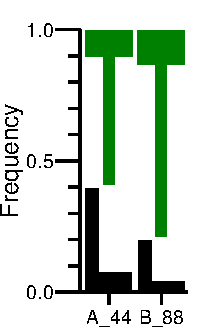

2022-11-10 17:06:29,694 - pocketoptimizer.ui - INFO - Wrote summary html file.
2022-11-10 17:06:29,695 - pocketoptimizer.ui - INFO - Creating design structure files.
2022-11-10 17:06:29,696 - pocketoptimizer.ui - INFO - Create Structures.
2022-11-10 17:06:38,582 - pocketoptimizer.ui - INFO - Creating PyMol scripts.
2022-11-10 17:06:38,609 - pocketoptimizer.ui - INFO - 10 best design solution(s) for design with forcefield: amber_ff14SB, scoring method: vina and ligand scaling: 5 identified.


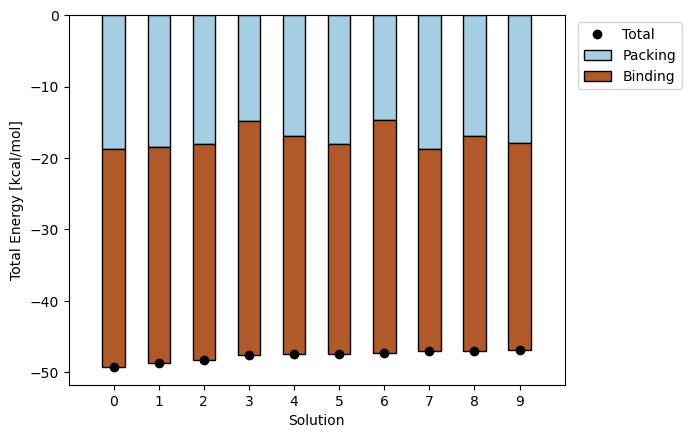

In [11]:
# Compute the lowest energy structures using linear programming
design.design(
    num_solutions=10,           #  Number of solutions to compute
    ligand_scaling=5,           #  Scaling factor for binding-related energies (You need to adapt this to approximate the packing and binding energies)
)

In [3]:
# Do not run this unless you want to fully clean your working directory from all created files and folders!
design.clean(scaffold=True, ligand=True)

2022-11-10 16:42:28,451 - pocketoptimizer.ui - INFO - All scaffold files were deleted.
2022-11-10 16:42:28,573 - pocketoptimizer.ui - INFO - All ligand files were deleted.
2022-11-10 16:42:28,577 - pocketoptimizer.ui - INFO - Logfile was deleted.
